In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('/Users/moshelaster/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

# Challenge 1

In [3]:
df['silly_val']=1

In [4]:
silly=df.silly_val.reshape(100,1)
dep=df.DomesticTotalGross


In [5]:
linreg = LinearRegression()
linreg.fit(silly, dep)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
#this is a flat line running across the mean answer
print linreg.intercept_
print linreg.coef_

100596875.22
[ 0.]


In [7]:
sil_test=np.array([i for i in range(100)]).reshape(100,1)


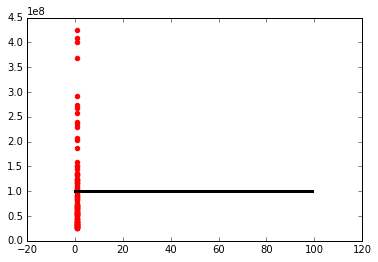

In [18]:
#actual outcome in red, prediction is just a line in the middle
plt.scatter(silly, dep,  color='red')
plt.plot(sil_test,linreg.predict(sil_test),color='black',linewidth=3)

plt.show()

In [19]:
residuals=(linreg.predict(sil_test) - dep)

(array([  3.,   1.,   0.,   3.,   4.,   3.,   3.,  15.,  21.,  47.]),
 array([ -3.24071172e+08,  -2.84161192e+08,  -2.44251213e+08,
         -2.04341233e+08,  -1.64431253e+08,  -1.24521274e+08,
         -8.46112942e+07,  -4.47013146e+07,  -4.79133498e+06,
          3.51186446e+07,   7.50286242e+07]),
 <a list of 10 Patch objects>)

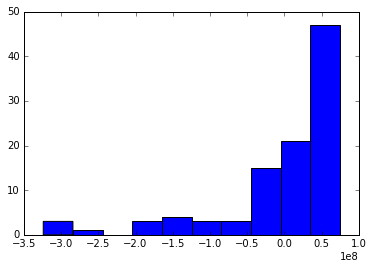

In [20]:
# the residuals have a left skew
plt.hist(residuals)

# Challenge 2

Plotting Regression Model of Budget vs. Domestic Gross

In [21]:
clean_df=df[df.Budget > 0]

In [22]:
dep_2=clean_df.DomesticTotalGross
budget=clean_df.Budget.reshape(len(clean_df.Budget),1)

In [23]:
linreg_2 = LinearRegression()
linreg_2.fit(budget, dep_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print linreg_2.intercept_
print linreg_2.coef_

44395595.1832
[ 0.78463743]


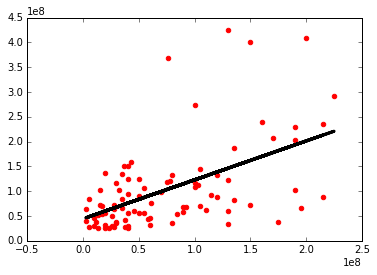

In [25]:
plt.scatter(budget, dep_2,  color='red')
plt.plot(budget,linreg_2.predict(budget),color='black',linewidth=3)

plt.show()

# Challenge 3

Add a categorial variable, ratings

In [26]:
dummies=pd.get_dummies(clean_df.Rating)

In [27]:
clean_df=pd.concat([clean_df, dummies], axis=1)

In [28]:
clean_df.head(20)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,silly_val,PG,PG-13,R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,0.0,1.0,0.0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,0.0,1.0,0.0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,1.0,0.0,0.0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,1.0,0.0,0.0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,0.0,1.0,0.0
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00,1,0.0,1.0,0.0
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00,1,0.0,1.0,0.0
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00,1,1.0,0.0,0.0
10,Star Trek Into Darkness,190000000.0,228778661,J.J. Abrams,PG-13,123,2013-05-16 00:00:00,1,0.0,1.0,0.0
11,Thor: The Dark World,170000000.0,206362140,Alan Taylor,PG-13,120,2013-11-08 00:00:00,1,0.0,1.0,0.0


In [30]:
dep_3=clean_df.DomesticTotalGross
ind_3=clean_df[['Budget','PG','PG-13','R']]

In [31]:
#need to reshape data to fit
linreg_3 = LinearRegression()
linreg_3.fit(ind_3, dep_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
print linreg_3.intercept_
print linreg_3.coef_
linreg_3.score(ind_3,dep_3)

47340189.4901
[  7.81604382e-01   1.03768217e+07  -6.88859250e+06  -3.48822917e+06]


0.29074809089211118

# Challenge 4

adjust feature- log transformation of income

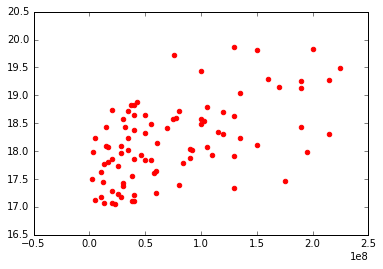

In [42]:
plt.scatter(clean_df.Budget, np.log(clean_df.DomesticTotalGross),  color='red')

In [49]:
linreg_4 = LinearRegression()
linreg_4.fit(ind_3, np.log(clean_df.DomesticTotalGross))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
linreg_4.score(ind_3,np.log(clean_df.DomesticTotalGross))

0.30232272031544061

In [71]:
metrics.mean_squared_error(np.log(clean_df.DomesticTotalGross),linreg_4.predict(ind_3))

0.34910971114756356

score improved

# Challenge #5

In [52]:
X=ind_3
y=np.log(clean_df.DomesticTotalGross)

In [62]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30, random_state=4444)

In [73]:
linreg_5 = LinearRegression()

linreg_5.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
metrics.mean_squared_error(y_train,linreg_5.predict(X_train))

0.3556043159078332

In [75]:
metrics.mean_squared_error(y_test,linreg_5.predict(X_test))

0.36994723024310677

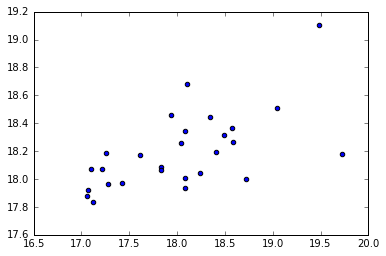

In [76]:
plt.scatter(y_test,linreg_5.predict(X_test))